<a href="https://colab.research.google.com/github/jessicamotam/AvantiBootcamp_ML/blob/main/ML_ProjetoPARTE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imantics --quiet
!apt-get install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split
%matplotlib inline
from tensorflow.keras import mixed_precision

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
import os

# Baixar o dataset
od.download("https://www.kaggle.com/datasets/maedemaftouni/covid19-ct-scan-lesion-segmentation-dataset/data")

# Definir o diretório onde o dataset foi baixado
dataset_dir = './covid19-ct-scan-lesion-segmentation-dataset/frames'

Skipping, found downloaded files in "./covid19-ct-scan-lesion-segmentation-dataset" (use force=True to force download)


In [5]:
images_dir ='./covid19-ct-scan-lesion-segmentation-dataset/frames'   # pega as imagens da IMAGES_DIR = FRAMES
masks_dir = './covid19-ct-scan-lesion-segmentation-dataset/masks'    # MASKS_DIR = MASKS

print(images_dir)

./covid19-ct-scan-lesion-segmentation-dataset/frames


In [6]:
images_listdir = os.listdir(images_dir)
masks_listdir = os.listdir(masks_dir)

### Imagem da pasta FRAMES

(512, 512, 3)


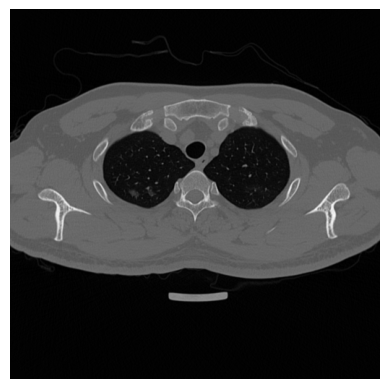

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
image_path = f"{images_dir}/{images_listdir[3]}"
# Load the image
image = mpimg.imread(image_path)
print(image.shape)
# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

### Imagem da pasta MASKS

(512, 512, 3)


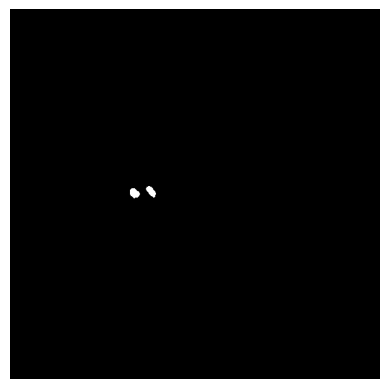

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
image_path = f"{masks_dir}/{masks_listdir[3]}"
# Load the image
image = mpimg.imread(image_path)
print(image.shape)
# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [9]:
image_paths=[f"{images_dir}/{i}" for i in images_listdir[0:1000]]
mask_paths=[f"{masks_dir}/{i}" for i in masks_listdir[0:1000]]

In [10]:
print(len(image_paths))
print(len(mask_paths))

1000
1000


In [11]:
def get_image(path):
    image_path = path
    image = mpimg.imread(image_path)
    return image

### Checking unique values in 3 channels in the image and mask (!!! não entendi o que são esses 3 canais??!!)

# **Canais de uma Imagem**


Uma imagem digital é composta por uma grade de pixels, e cada pixel pode conter informações sobre cor. Os canais são as diferentes componentes de cor que compõem cada pixel. Aqui estão alguns exemplos comuns:


--> Imagem RGB:

-R (Red): Canal vermelho.
-G (Green): Canal verde.
-B (Blue): Canal azul.


Uma imagem RGB tem três canais. Cada canal armazena valores que representam a intensidade da respectiva cor em cada pixel. O valor de cada canal geralmente varia de 0 a 255 (para imagens de 8 bits), onde 0 significa nenhuma intensidade e 255 significa máxima intensidade.
Imagem em Escala de Cinza:


Uma imagem em escala de cinza tem apenas um canal, que representa a intensidade da luz (de preto a branco).
Outros Formatos:


Imagens com outros espaços de cor (como RGBA, que inclui um canal alfa para transparência) têm canais adicionais.

In [12]:
ct_img=get_image(image_paths[0])
mask=get_image(mask_paths[0])

In [13]:
print(ct_img.shape)
print(mask.shape)

(512, 512, 3)
(512, 512, 3)


###  Verifica e mostra  os valores únicos presentes em cada imagem das pastas Frames e Masks

In [14]:
# Check unique values in each channel for the first image
for i in range(3):
    unique_values = np.unique(ct_img[:, :, i])
    print(f"Unique values in channel {i} of ct_image: {unique_values}")

# Similarly for the predicted mask
for i in range(3):
    unique_values = np.unique(mask[:, :, i])
    print(f"Unique values in channel {i} of mask: {unique_values}")

Unique values in channel 0 of ct_image: [0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608
 0.30588236 0.30980393 0.3137255  0.31764707 0.32156864 0.3254902
 0.32941177 0.33333334 0.

In [15]:
from skimage.color import rgb2gray

def remove_channels(image):
    return rgb2gray(image)

(512, 512, 3)


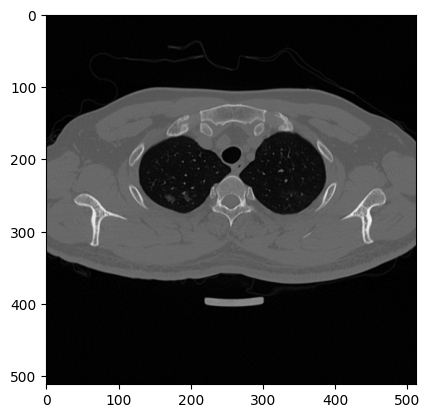

In [16]:
image_3=get_image(image_paths[3])
print(image_3.shape)
plt.imshow(image_3)

(512, 512)


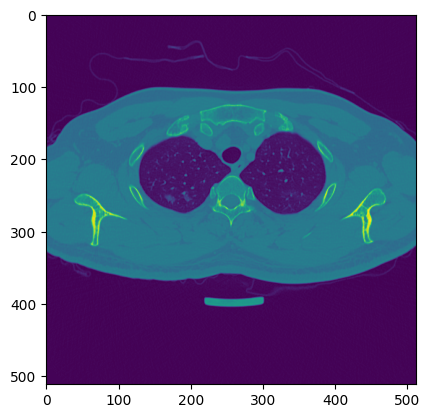

In [17]:
image_1 = remove_channels(image_3)
print(image_1.shape)
plt.imshow(image_1)

In [18]:
image=image_1[:,:,np.newaxis]
print(image.shape)

(512, 512, 1)


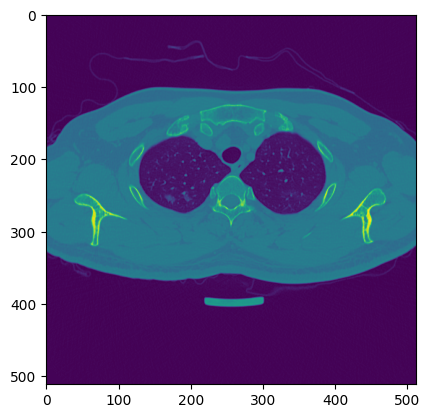

In [19]:
plt.imshow(image)

In [20]:
ct_images=[remove_channels(get_image(path)) for path in image_paths]
ct_images=[image[:,:,np.newaxis] for image in ct_images]

In [21]:
print(np.unique(ct_images[0]))

[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235295 0.08627451 0.09019607
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764705 0.12156864 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294117 0.15686275 0.16078432
 0.1647059  0.16862744 0.17254902 0.17647061 0.18039215 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392156 0.20784314
 0.21176471 0.21568628 0.21960783 0.22352941 0.22745098 0.23137254
 0.2352941  0.23921569 0.24313727 0.24705881 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608
 0.30588233 0.30980393 0.3137255  0.31764704 0.32156864 0.3254902
 0.3294118  0.33333334 0.33725488 0.3411765  0.34509805 0.3490196

In [22]:
masks=[get_image(path) for path in mask_paths]

In [23]:
ct_images=np.array(ct_images)
masks = np.array(masks)
print(type(ct_images))
print(type(masks))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
masks=masks[:,:,:,1]

In [25]:
print(np.unique(masks))

[0.         0.04705882 0.06666667 0.08235294 1.        ]


In [25]:
# Convert train_ct_images to float32
ct_images = ct_images.astype(np.float32)
ct_images=ct_images[:600]
masks=masks[:600]
# Convert train_masks to int32
masks = masks.astype(np.int32)

# Verify the data types
print("train_ct_images dtype:", ct_images.dtype)
print("train_masks dtype:", masks.dtype)

train_ct_images dtype: float32
train_masks dtype: int32


In [26]:
ct_images.shape

(600, 512, 512, 1)

In [27]:
print(np.unique(masks))

[0 1]


In [28]:
train_ct_images, test_ct_images, train_mask, test_mask = train_test_split(
    ct_images,masks, test_size=0.2, random_state=42
)

In [29]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1e-6):

    # Ensure both y_true and y_pred are float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Flatten the arrays to be 1D
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)

    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f)

    return (2. * intersection + smooth) / (union + smooth)

In [30]:
pip install tensorflow

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision

# Mixed Precision Setup
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

kernel_initializer = 'he_uniform'

def unet_plus_plus_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    # Contraction path
    c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = BatchNormalization()(c1)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(256, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)

    # Upsampling path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c4)
    u6 = concatenate([u6, c3])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c2])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Dropout(0.1)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c1], axis=3)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c8)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

    model.summary()

    return model

# Instantiate the model
model = unet_plus_plus_model(512, 512, 1)

# Example training loop
# Replace `train_data`, `train_labels`, `val_data`, and `val_labels` with your actual data
# model.fit(train_data, train_labels, epochs=20, batch_size=2, validation_data=(val_data, val_labels))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast (Cast)               │ (None, 512, 512, 1)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 32)   │            320 │ cast[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512, 512, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512, 512, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 32)   │          9,248 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 32)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 64)   │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 64)   │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256, 256, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 64)   │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 128)  │            512 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128, 128, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 64, 64, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)       

 Total params: 1,927,841 (7.35 MB)

 Trainable params: 1,926,433 (7.35 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [32]:
# Verificar a versão do TensorFlow
import tensorflow as tf
print(tf.__version__)

# Instalar a versão correta do tensorflow-addons
!pip install tensorflow-addons==0.20.0  # Ajuste conforme necessário

# Reinicie o ambiente após a instalação

# Importar TensorFlow e TensorFlow Addons
import tensorflow as tf
import tensorflow_addons as tfa

# Testar uma funcionalidade do TensorFlow Addons
tfa.optimizers.ActivationCheckpointSaver()

2.18.0
  Using cached tensorflow_addons-0.20.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.20.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (591 kB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.23.0
    Uninstalling tensorflow-addons-0.23.0:
      Successfully uninstalled tensorflow-addons-0.23.0


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.18.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

ImportError: cannot import name 'tf_utils' from 'keras.utils' (/usr/local/lib/python3.10/dist-packages/keras/api/utils/__init__.py)

In [33]:
 pip install --upgrade tensorflow tensorflow-addons

  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.20.0
    Uninstalling tensorflow-addons-0.20.0:
      Successfully uninstalled tensorflow-addons-0.20.0


In [34]:
history = model.fit(
    train_ct_images,
    train_mask,  # Use the one-hot encoded masks
    validation_split=0.1,  # Use a fraction of the training data for validation
    batch_size=2,
    epochs=15,
    verbose=1
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


216/216 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.4204 - loss: 1.0248 - val_accuracy: 0.8608 - val_loss: 0.4854
Epoch 2/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.8758 - loss: 0.4166 - val_accuracy: 0.9760 - val_loss: 0.2173
Epoch 3/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9671 - loss: 0.2355 - val_accuracy: 0.9808 - val_loss: 0.1419
Epoch 4/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9810 - loss: 0.1618 - val_accuracy: 0.9828 - val_loss: 0.1119
Epoch 5/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9865 - loss: 0.1226 - val_accuracy: 0.9835 - val_loss: 0.0969
Epoch 6/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9858 - loss: 0.1058 - val_accuracy: 0.9837 - val_loss: 0.0894
Epoch 7/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9857 - loss: 0.0949 - val_accuracy: 0.9838 - val_loss: 0.0856
Epoch 8/15
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9862 - loss: 0.0866 - val_accurac